
Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review     

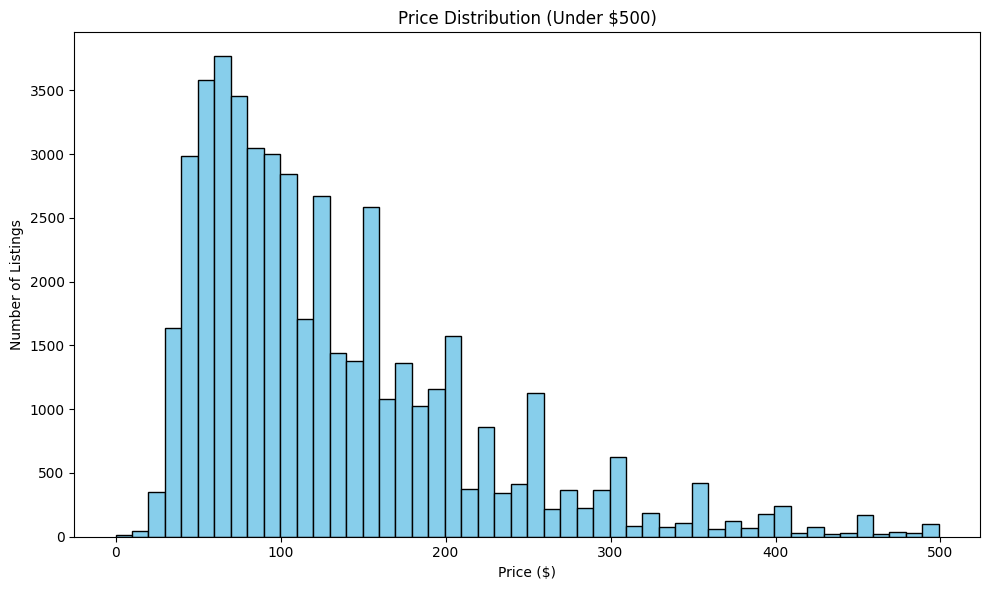

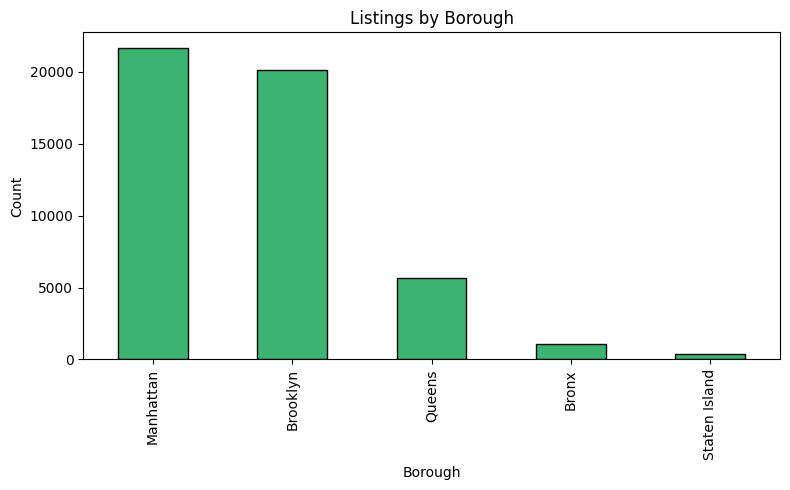

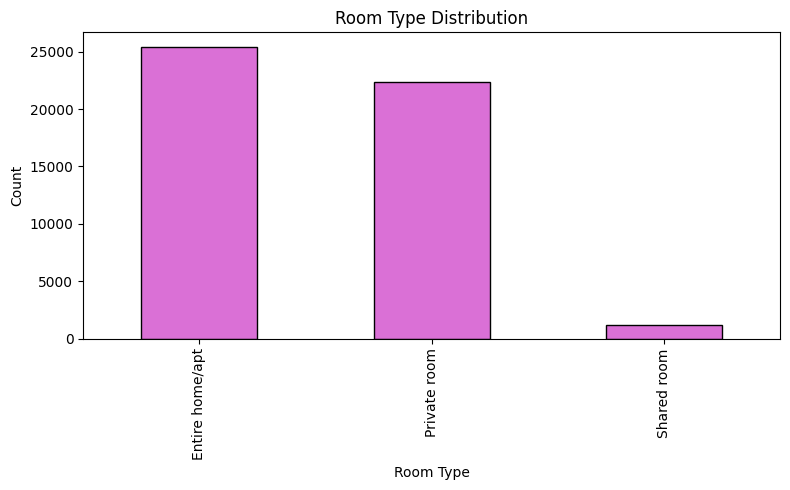

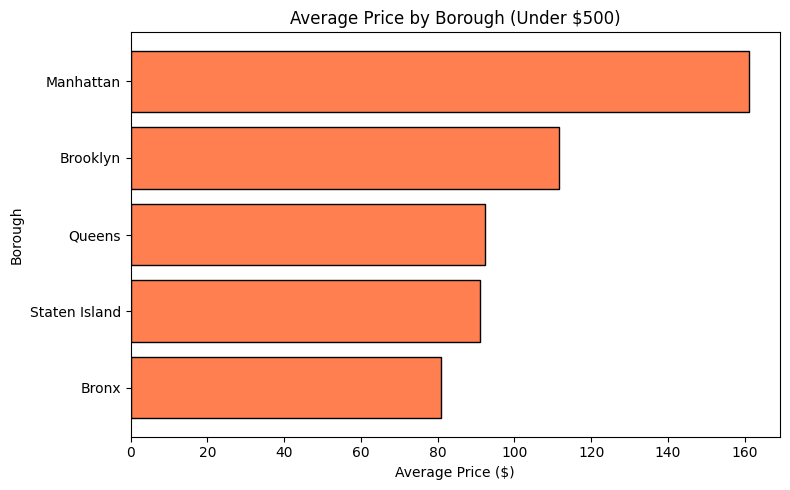

<Figure size 800x500 with 0 Axes>

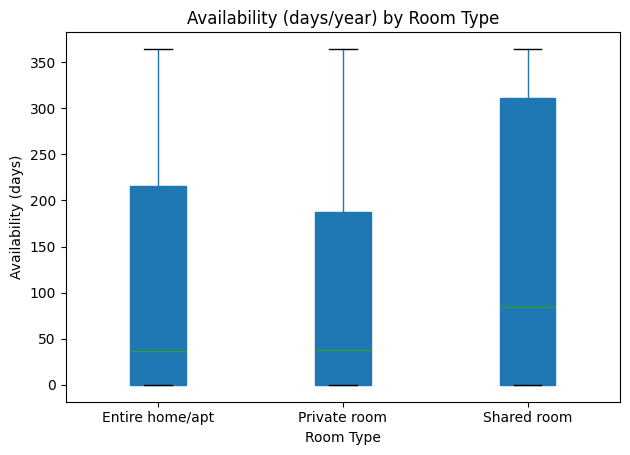

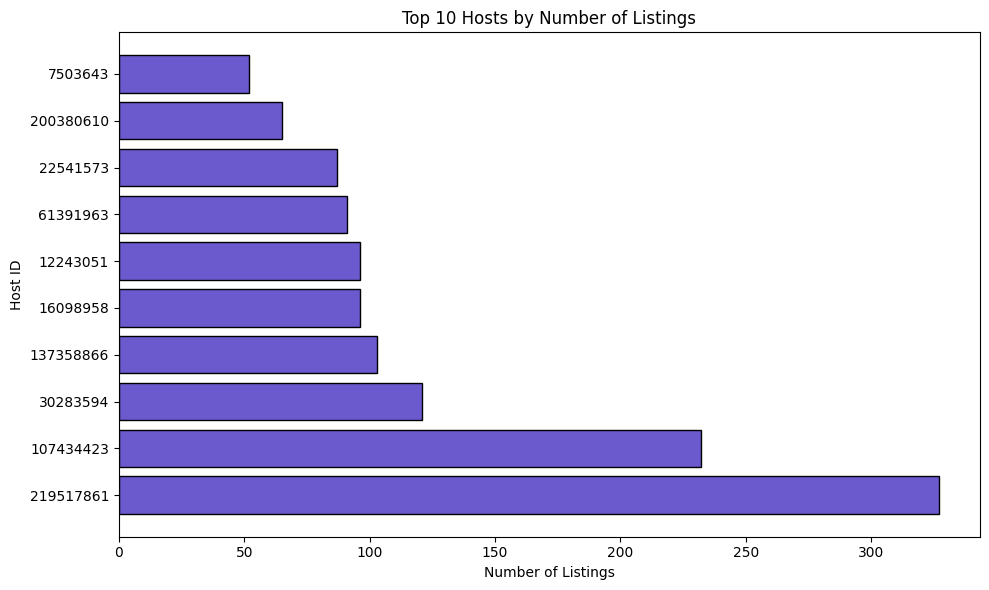

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading dataset 
df = pd.read_csv("AB_NYC_2019.csv")

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Basic Information
print("\nDataset Info:\n")
print(df.info())

print("\nNull Values:\n")
print(df.isnull().sum())

print("\nSummary Statistics:\n")
print(df.describe())

# Price Distribution
plt.figure(figsize=(10, 6))
plt.hist(df[df['price'] < 500]['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Price Distribution (Under $500)')
plt.xlabel('Price ($)')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()

# Listings by Borough
plt.figure(figsize=(8, 5))
df['neighbourhood_group'].value_counts().plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title('Listings by Borough')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Room Type Distribution
plt.figure(figsize=(8, 5))
df['room_type'].value_counts().plot(kind='bar', color='orchid', edgecolor='black')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Average Price by Borough
avg_price = df[df['price'] < 500].groupby('neighbourhood_group')['price'].mean().sort_values()
plt.figure(figsize=(8, 5))
plt.barh(avg_price.index, avg_price.values, color='coral', edgecolor='black')
plt.title('Average Price by Borough (Under $500)')
plt.xlabel('Average Price ($)')
plt.ylabel('Borough')
plt.tight_layout()
plt.show()

# Availability by Room Type
plt.figure(figsize=(8, 5))
df[df['availability_365'] < 365].boxplot(column='availability_365', by='room_type', grid=False, patch_artist=True)
plt.title('Availability (days/year) by Room Type')
plt.suptitle('')
plt.xlabel('Room Type')
plt.ylabel('Availability (days)')
plt.tight_layout()
plt.show()

# Top Hosts by Number of Listings
top_hosts = df['host_id'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_hosts.index.astype(str), top_hosts.values, color='slateblue', edgecolor='black')
plt.title('Top 10 Hosts by Number of Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Host ID')
plt.tight_layout()
plt.show()
